# Final Project

Heart disease is the leading cause of death in the United States, it causes about 1 out of every 4 deaths. The key risk factors for heart disease are high blood pressure, high blood cholesterol, and smoking. Several other medical conditions and lifestyle choices that can increase the risk for heart disease include diabetes, obesity and overweight, phyiscal inactivity, unhealthy diet and excessive alcohol use. The risk for heart disease can be greatly reduced through lifestyle changes and, in some cases, medicine.

This project aims to:
- Visualize and summarize the information around Missouri leading causes of deaths in 2014-2017
- Explore Missouri resident heart disease status including heart disease mortality, heart disease hospitalizations and emergency room visits in county study level, and to explore if there are probable relation between heart disease mortality between emergency room vistis, average personal income, population density, and so on.
- Explore the probable relationship between heart disease mortality and common risk factors in Missouri county level.

## 1. Data manipulation

#### 1.1 Data Source

- Missouri leading causes of death information is retrieved from National center for health statistics in CDC website: https://www.cdc.gov/nchs/pressroom/states/missouri/missouri.htm.
- Heart disease profile data were downloaded as local files from Missouri Public Health Information Management System.
- Income and land area information come from websites: Missouri economic research and information center https://meric.mo.gov/data/income-measures/county-per-capita-personal-income, https://www.indexmundi.com/facts/united-states/quick-facts/missouri/land-area#table


#### 1.2 Missouri leading causes of death information in 2014-2017
The Missouri leading causes of death data were read from CDC website:https://www.cdc.gov/nchs/pressroom/states/missouri/missouri.htm
<br>
Death rates are age-adjusted and the age-adjusted rates for deaths are per 100,000 population.

In [1]:
# Read tables from website
import pandas as pd
import numpy as np
tables = pd.read_html('https://www.cdc.gov/nchs/pressroom/states/missouri/missouri.htm')

In [2]:
# 2014 -2017 Missouri leading causes of death data
lcd2017 = tables[1]
lcd2016 = tables[5]
lcd2015 = tables[9]
lcd2014 = tables[13]

In [3]:
# function used to change columns names, assign a new colunm.

def changeColumns (dataframe, x):
    """(dataframe, str) -> dataframe
    
    This function returns a dataframe that change the columns names and add a new column ."""
    
    a = dataframe.columns[0][:-6]
    b = dataframe.columns[1]
    c = dataframe.columns[2][:4]
    d = dataframe.columns[3][:-1]
    e = dataframe.columns[4][:-2]
    dataframe.columns = [a, b, c, d, e]
    dataframe['Year'] = x
    dataframe[a] = dataframe[a].str[3:]
    dataframe.iloc[9,0] = dataframe.iloc[9,0][1:]
    
    dataframe = dataframe[[a,'Year',b,c,d,e]].copy()
    return dataframe

In [4]:
# change data columns names
lcd2017 = changeColumns(lcd2017, 2017).copy()

In [5]:
lcd2016 = changeColumns(lcd2016, 2016)

In [6]:
lcd2015 = changeColumns(lcd2015, 2015)

In [7]:
lcd2014 = changeColumns(lcd2014, 2014)

In [8]:
# Merge 2014 - 2017 years' data
lcd = pd.concat([lcd2014, lcd2015, lcd2016,lcd2017])
lcd = lcd.reset_index()

In [9]:
lcd.columns

Index(['index', 'MO Leading Causes of Death', 'Year', 'Deaths', 'Rate',
       'State Rank', 'U.S. Rate'],
      dtype='object')

In [10]:
# long to wide pivoting tranformation
lcdp = lcd.pivot(index='Year', columns='MO Leading Causes of Death', values=['Deaths','Rate'])

### 1.3 Heart disease mortality, hospitalization, emergency room visits data
To read Missouri heart disease mortality, hospitalizations due to heart disease, emergency room visits due to heart disease on county level from local files. To retrieve income, land area data from website.
<br>
Death rates are age-adjusted and the age-adjusted rates for deaths are per 100,000 population. The age-adjusted rates for hospitalizations and procedures are per 10,000 population and age-adjusted rates for emergency department visits are per 1,000 population.

In [11]:
# function to read csv and excel files

def readfiles(filepath, t):
    """(filepath, str) -> dataframe
    
    This function reads csv or excel files and returns a dataframe."""
    if t == 'csv':
        df = pd.read_csv(filepath,header =2, skipfooter =3)
    elif t == 'excel':
        df = pd.read_excel(filepath, header = 2, skipfooter =3) 
    return df

In [12]:
# read heart disease data from local files.
hd = readfiles('MOHDP_hd_2019.csv','csv')

/opt/tljh/user/lib/python3.6/site-packages/ipykernel_launcher.py:8: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  


In [13]:
# heart disease mortality data
hdm = readfiles('MOHDP_hdm_2009-2019.csv','csv')

/opt/tljh/user/lib/python3.6/site-packages/ipykernel_launcher.py:8: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  


In [14]:
# data for emergency room visits discharges with a principal diagnosis of heart disease
hdev = readfiles('MOHDP_emergencyroomvisits.xlsx', 'excel')

In [15]:
# data: hospitalizations discharges with a principal diagnosis of heart disease
hdh = readfiles('MOHDP_hospitalizations.xlsx','excel')

In [16]:
# function to filter data, drop columns, change columns names
def dataform(dataframe, pre):
    """(filepath, str) -> dataframe
    
    This function returns a dataframe."""
    filter = ['Statewide','County']
    dataframe = dataframe[dataframe['Geography Type'].isin(filter)]
    
    dataframe = dataframe.drop(['Lower 95% Confidence Limit', 'Upper 95% Confidence Limit', 'Significantly Different'], axis = 1)
    
    a = dataframe.columns[0]
    b = dataframe.columns[1]
    c = pre + '_'+ dataframe.columns[2]
    d = pre + '_' + dataframe.columns[3]
    e = pre + '_' + dataframe.columns[4]
    dataframe.columns = [a, b, c, d, e]
        
    return dataframe

In [17]:
# transform data columns and filter data
hd = dataform(hd, 'Heart Disease')

In [18]:
hdm = dataform(hdm, 'HD Mortality')
hdev = dataform(hdev, 'HD Emergency Room Visits')
hdh = dataform(hdh, 'HD Hospitalizations')

In [19]:
from functools import reduce

In [20]:
# Merge data
hdmc = reduce(lambda x,y: pd.merge(x,y, on=["Geography", "Geography Type"], how='left'), [hdm,hd,hdev,hdh])

In [21]:
#Retrieve personal income data from website
tbs= pd.read_html('https://meric.mo.gov/data/income-measures/county-per-capita-personal-income', header = 1)
len(tbs)

2

In [22]:
t1 = tbs[1]

In [23]:
# reshape dataframe
income1 = t1[t1.columns[0:3]]
income2 = t1[t1.columns[5:8]]
income2.columns = income1.columns
income2['Area'] = income2['Area'].replace(['St. Louis', 'St. Louis City'], ['St. Louis City', 'St. Louis County'])

/opt/tljh/user/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [24]:
income = income1.append(income2)
income.columns = ['Geography', '2016 Per Capita Income', '2017 Per Capita Income']

In [25]:
# Convert income data to numeric and append to heart disease mortality dataframe.
income['2016 Per Capita Income'] = income['2016 Per Capita Income'].str[1:].str.replace(',', '').astype(float)
income['2017 Per Capita Income'] = income['2017 Per Capita Income'].str[1:].str.replace(',', '').astype(float)
hdmc['2016 Per Capita Income'] = income['2016 Per Capita Income'].values
hdmc['2017 Per Capita Income'] = income['2017 Per Capita Income'].values

In [26]:
# Retrieve county land area data
lands = pd.read_html('https://www.indexmundi.com/facts/united-states/quick-facts/missouri/land-area#table')
len(lands)

1

In [27]:
# Manipulate land area data: change data columns name, add Missouri land area data to first row, sort data by county names.
land = lands[0]
land.columns= ['Geography', 'Area']
new_row = pd.DataFrame({'Geography':'Missouri', 'Area': 68741.52}, index = [0])
land = pd.concat([new_row, land]).reset_index(drop = True)
land.iloc[101,0] = 'St. Louis county'
land = land.sort_values(by ='Geography')

In [28]:
# Read population data
p = pd.read_excel('population2019.xlsx', header =5, skipfooter =3)

In [29]:
# population data manipulation
p = p[p.columns[0:2]]
p.columns= ['Geography', '2019 Population']
p = pd.concat([p.iloc[[-1]], p]).reset_index(drop = True)
p = p[:-2]

In [30]:
# Append population data, land area data to heart disease mortality data and calculate population density.
hdmc['2019 Population'] = p['2019 Population'].values
hdmc['Area'] = land['Area'].values
hdmc['Population density/sq km'] = round(hdmc['2019 Population'] / hdmc['Area'] /2.58999, 2)

In [31]:
hdmc.columns

Index(['Geography', 'Geography Type', 'HD Mortality_Data Years',
       'HD Mortality_Count', 'HD Mortality_Rate', 'Heart Disease_Data Years',
       'Heart Disease_Population Estimate', 'Heart Disease_Weighted Percent',
       'HD Emergency Room Visits_Data Years', 'HD Emergency Room Visits_Count',
       'HD Emergency Room Visits_Rate', 'HD Hospitalizations_Data Years',
       'HD Hospitalizations_Count', 'HD Hospitalizations_Rate',
       '2016 Per Capita Income', '2017 Per Capita Income', '2019 Population',
       'Area', 'Population density/sq km'],
      dtype='object')

#### 1.4 Heart disease risk factors data
To read heart disease risk factors data from local files - data downloaded from Missouri Public Health Information Management System. The data include Risk Factors for Heart Disease Among Adults 18 Years and Older.
<br>
The weighted percentages for risk factors are per 100 population.

In [32]:
# read adults 18 years and older with high blood pressure data by using readfiles function
hbp = readfiles('MOHDP_hbp_2016.csv', 'csv')

/opt/tljh/user/lib/python3.6/site-packages/ipykernel_launcher.py:8: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  


In [33]:
# read high cholesterol data
hc = readfiles('MOHDP_hc.csv', 'csv')

/opt/tljh/user/lib/python3.6/site-packages/ipykernel_launcher.py:8: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  


In [34]:
# read current smoking data
smoking = readfiles('MOHDP_smoking.xlsx', 'excel')

In [35]:
# read diabetes data
diabetes= readfiles('MOHDP_diabetes.csv', 'csv')

/opt/tljh/user/lib/python3.6/site-packages/ipykernel_launcher.py:8: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  


In [36]:
# read obesity data
obesity = readfiles('MOHDP_obesity.xlsx', 'excel')

In [37]:
# read overweight data
overweight= readfiles('MOHDP_overweight.csv', 'csv')

/opt/tljh/user/lib/python3.6/site-packages/ipykernel_launcher.py:8: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  


In [38]:
# read physical inactivity data
pi = readfiles('MOHDP_physical inactivity.xlsx', 'excel')

In [39]:
# function to manipulate data columns.
def dataform1(dataframe, pre):
    """(filepath, str) -> dataframe
    
    This function returns a dataframe."""
    filter = ['Statewide','County']
    dataframe = dataframe[dataframe['Geography Type'].isin(filter)]
    
    dataframe = dataframe.drop(['Lower 95% Confidence Limit', 'Upper 95% Confidence Limit', 'Significantly Different'], axis = 1)
    
    a = dataframe.columns[0]
    b = dataframe.columns[1]
    c = dataframe.columns[2]
    d = pre + '_' + dataframe.columns[3]
    e = pre + '_' + dataframe.columns[4]
    dataframe.columns = [a, b, c, d, e]
        
    return dataframe

In [40]:
# transform data frames
hbp = dataform1(hbp, 'High Blood Pressure')
hc = dataform1(hc, 'High Cholesterol')
smoking = dataform1(smoking, 'Smoking')
diabetes = dataform1(diabetes, 'Diabetes')
obesity = dataform1(obesity, 'Obesity')
overweight = dataform1(overweight, 'Overweight')
pi = dataform1(pi, 'Physical Inactivity')

In [41]:
pi.columns

Index(['Geography', 'Geography Type', 'Data Years',
       'Physical Inactivity_Population Estimate',
       'Physical Inactivity_Weighted Percent'],
      dtype='object')

In [42]:
from functools import reduce

In [43]:
# merge data
rf_list = [hbp, hc, smoking, diabetes, obesity, overweight, pi]
riskfactors = reduce(lambda x,y: pd.merge(x,y, on=["Geography", "Geography Type", "Data Years"], how='left'), rf_list)

In [44]:
rf1 = hdmc[['Geography', 'Geography Type','2016 Per Capita Income', 'Population density/sq km']]

In [45]:
# Merge heart disease, heart disease mortality, population density, income data to risk factors data
hd_riskfactors = reduce(lambda x,y: pd.merge(x,y, on=["Geography", "Geography Type"], how='left'), [hd, hdm, riskfactors, rf1])

### 2. Descriptive and Visualization

#### 2.1 Missouri Leading causes of death from 2014 to 2017

In [46]:
# long to wide to pivot leading causes data to show the death rate
lcd.pivot(index='Year', columns='MO Leading Causes of Death', values='Rate')

MO Leading Causes of Death,Accidents,Alzheimer’s disease,Cancer,Chronic Lower Respiratory Disease,Diabetes,Flu/Pneumonia,Heart Disease,Kidney Disease,Stroke,Suicide
Year,,,,,,,,,,
2014,41.0,27.4,177.7,51.4,19.4,18.1,194.7,19.6,48.7,16.3
2015,50.9,28.7,173.4,52.8,19.7,17.9,197.9,19.9,40.8,17.1
2016,57.0,30.0,167.0,52.1,20.1,15.1,192.1,19.6,40.4,18.4
2017,58.8,32.3,167.2,50.7,21.0,16.7,191.1,19.6,41.0,18.5


In [47]:
import matplotlib.pyplot as plt
import seaborn as sns

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

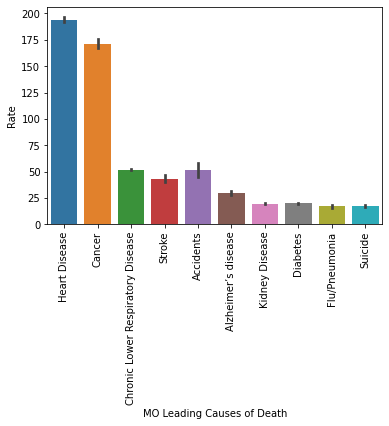

In [48]:
sns.barplot(x='MO Leading Causes of Death', y='Rate', data=lcd)
plt.xticks(rotation=90)

##### Conclusion: According to the table and graph, heart disease is the leading cause for death and the rate in Missouri is slight dropping from 2014 to 2017.

#### 2.2 Missouri resident heart disease mortality, hospitalizaitons, emergency room visits data and the relations.

In [49]:
hdmc.head(2)

,Geography,Geography Type,HD Mortality_Data Years,HD Mortality_Count,HD Mortality_Rate,Heart Disease_Data Years,Heart Disease_Population Estimate,Heart Disease_Weighted Percent,HD Emergency Room Visits_Data Years,HD Emergency Room Visits_Count,HD Emergency Room Visits_Rate,HD Hospitalizations_Data Years,HD Hospitalizations_Count,HD Hospitalizations_Rate,2016 Per Capita Income,2017 Per Capita Income,2019 Population,Area,Population density/sq km
0,Missouri,Statewide,2009 - 2019,"157,199",193.95,2019,"207,371",4.4,2011 - 2015,470474,15.12,2011 - 2015,384331,109.46,43587.0,44978.0,6137428,567.32,4176.96
1,Adair,County,2009 - 2019,510,164.90,2019,"10,691",5.6,2011 - 2015,1839,15.50,2011 - 2015,1343,105.14,31186.0,32037.0,25343,432.70,22.61


In [50]:
# Calulate the maximum and minimum values and display the counties with maxium value or minium value
filter = hdmc['Geography Type'] == 'County'
df = hdmc[filter]
columnlist = [ 'HD Mortality_Rate','Heart Disease_Weighted Percent', \
          'HD Emergency Room Visits_Rate', 'HD Hospitalizations_Rate','2016 Per Capita Income', 'Population density/sq km']

In [51]:
# Function to calulate the maximum and minimum values and display the counties with maxium value or minium value

def stat(df, columnlist):
    """(filepath, list) -> dataframe
    
    This function returns a new dataframe with statistic data."""
    sdata ={}
    for col in columnlist:
        ma = df[col].max()
        mal = df.loc[df[col] == df[col].max(), 'Geography'].values
        mi = df[col].min()
        mil = df.loc[df[col] == df[col].min(), 'Geography'].values
        me = df[col].mean()
        sdata[col] = {'County with maximum value': mal, 'Maximum value': ma, 'County with minimum value': mil, 'Minimum value': mi, \
                     'Average value': me}

    return(pd.DataFrame.from_dict(sdata))

In [52]:
stat(df, columnlist)

,HD Mortality_Rate,Heart Disease_Weighted Percent,HD Emergency Room Visits_Rate,HD Hospitalizations_Rate,2016 Per Capita Income,Population density/sq km
County with maximum value,[Pemiscot],"[Barry, Barton, Benton, Bollinger, Butler, Cap...",[Iron],[Iron],[St. Louis County],[St. Louis City]
Maximum value,351.32,5.7,33.03,176.16,64533,1874.54
County with minimum value,[Worth],"[Bates, Caldwell, Cass, Clay, Clinton, Jackson...",[Lewis],[Lewis],[Douglas],[Mississippi]
Minimum value,135.79,3,3.23,36.09,25511,0.07
Average value,211.157,5.10522,16.1329,107.662,35314.5,52.1617


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f61ba713048>,
      dtype=object)

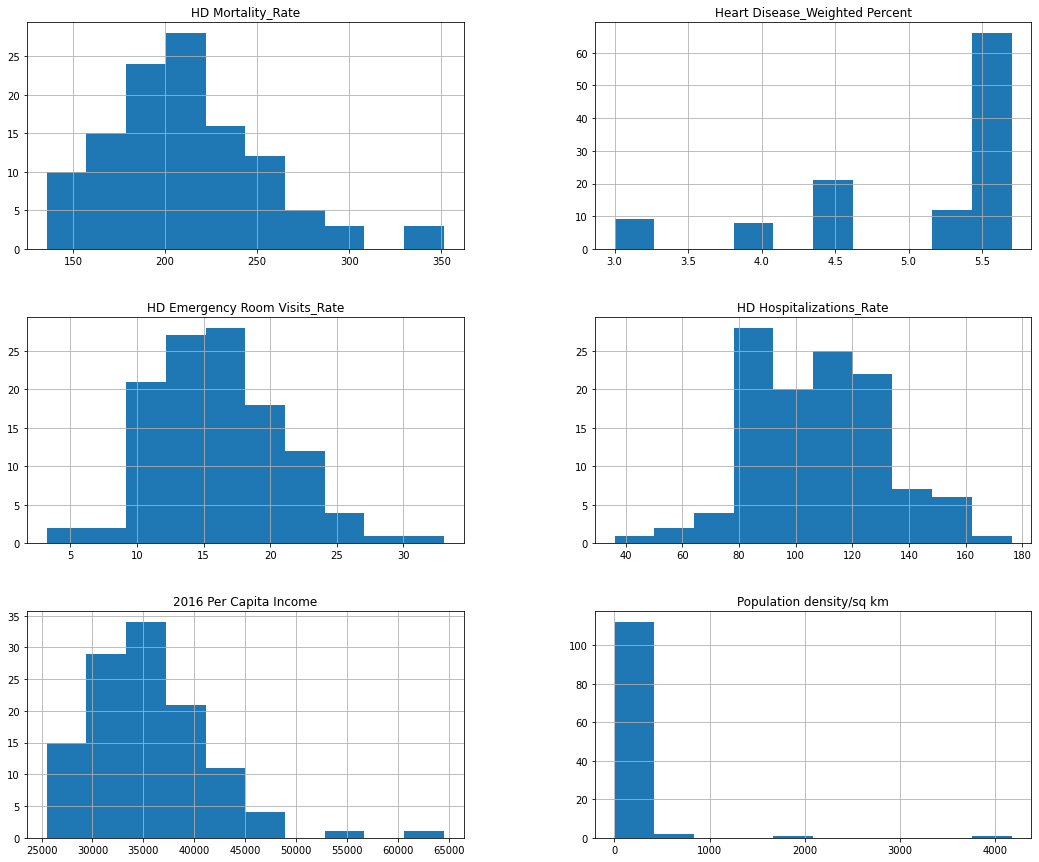

In [53]:
hdmc[columnlist].hist(figsize=(18,15))

In [54]:
hdmc['2016 Per Capita Income/1000'] = hdmc['2016 Per Capita Income']/1000

In [55]:
plist = hdmc[['HD Mortality_Rate','Heart Disease_Weighted Percent', 'HD Emergency Room Visits_Rate', \
          'HD Hospitalizations_Rate', '2016 Per Capita Income/1000', 'Population density/sq km']].copy()

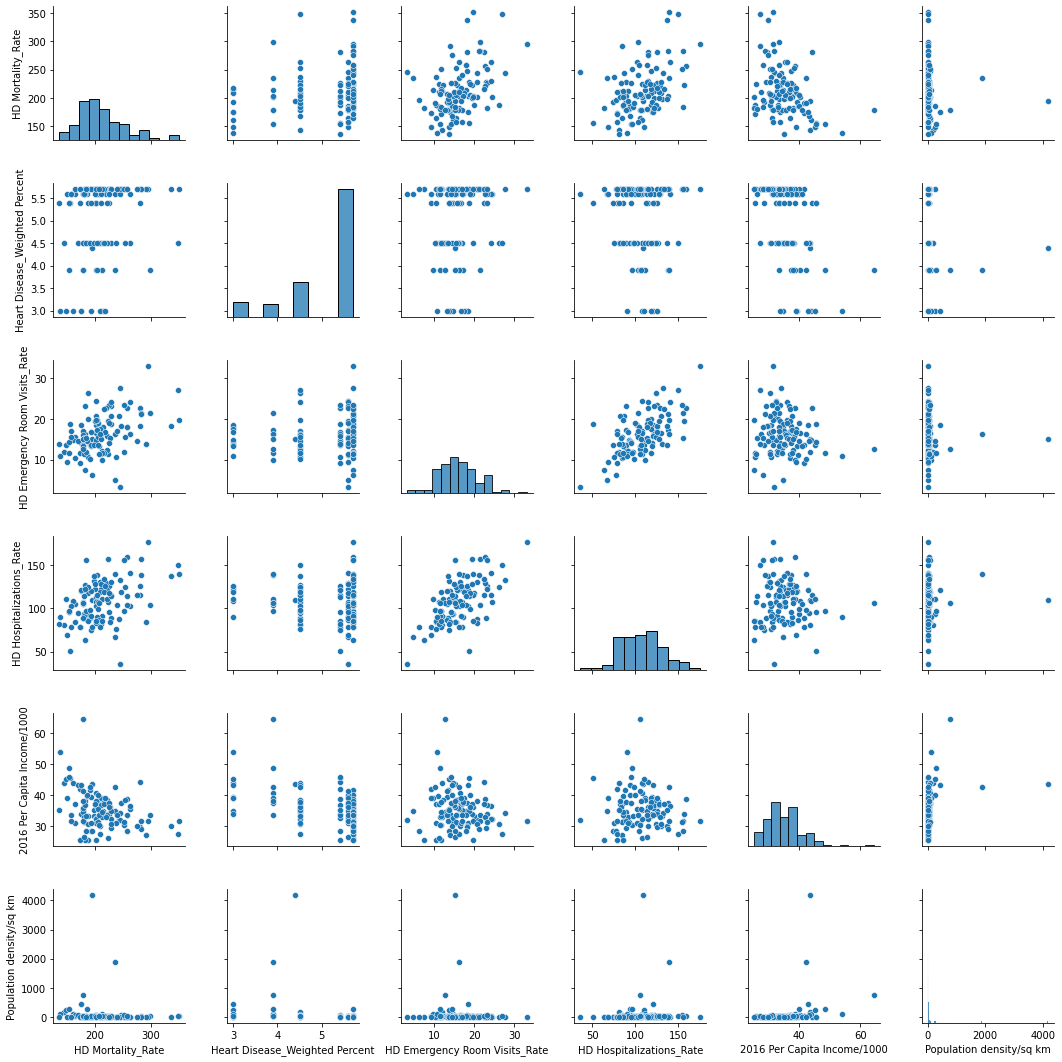

In [56]:
sns.pairplot(plist)

According the graphs, it looks like heart disease mortality rate is positively related to heart disease emergency room visists rate and heart disease hospitalization. The hospitalization discharges with a principal diagnosis of heart disease is positively related to the emergency room visits. It looks like that 2016 Per Capita income is negatively correlated to heart disease mortality.

There is an outlier in Population density data and it looks like the population density of St.Louis City is much higher than other county in Missouri.

Text(0.5, 0, 'Heart Disease Mortality_Rate')

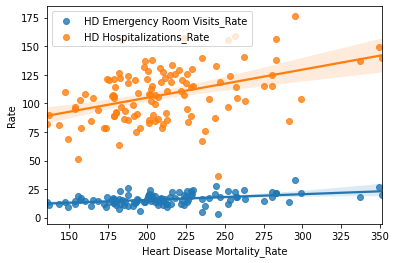

In [57]:
ax = sns.regplot(data=hdmc, x='HD Mortality_Rate', y='HD Emergency Room Visits_Rate', order=2, label='HD Emergency Room Visits_Rate')
sns.regplot(data=hdmc, x='HD Mortality_Rate', y='HD Hospitalizations_Rate', label='HD Hospitalizations_Rate', ax=ax)
ax.legend()
ax.set_ylabel('Rate')
ax.set_xlabel('Heart Disease Mortality_Rate')

Text(0.5, 0, 'Heart Disease Mortality_Rate')

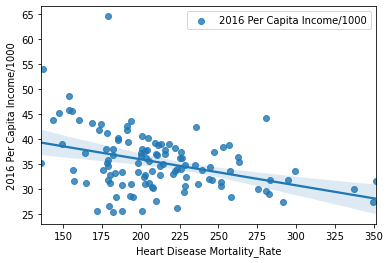

In [58]:
ax = sns.regplot(data=hdmc, x='HD Mortality_Rate', y='2016 Per Capita Income/1000', label='2016 Per Capita Income/1000')
ax.legend()
ax.set_ylabel('2016 Per Capita Income/1000')
ax.set_xlabel('Heart Disease Mortality_Rate')

#### 2.3 Heart disease commom risk factors

In [59]:
hd_riskfactors.columns

Index(['Geography', 'Geography Type', 'Heart Disease_Data Years',
       'Heart Disease_Population Estimate', 'Heart Disease_Weighted Percent',
       'HD Mortality_Data Years', 'HD Mortality_Count', 'HD Mortality_Rate',
       'Data Years', 'High Blood Pressure_Population Estimate',
       'High Blood Pressure_Weighted Percent',
       'High Cholesterol_Population Estimate',
       'High Cholesterol_Weighted Percent', 'Smoking_Population Estimate',
       'Smoking_Weighted Percent', 'Diabetes_Population Estimate',
       'Diabetes_Weighted Percent', 'Obesity_Population Estimate',
       'Obesity_Weighted Percent', 'Overweight_Population Estimate',
       'Overweight_Weighted Percent',
       'Physical Inactivity_Population Estimate',
       'Physical Inactivity_Weighted Percent', '2016 Per Capita Income',
       'Population density/sq km'],
      dtype='object')

In [60]:
# Calulate the maximum, minimum and average values and display the counties with maximum value or minimum value
filter = hd_riskfactors['Geography Type'] == 'County'
df2 = hd_riskfactors[filter]
columnlist2 = [ 'HD Mortality_Rate','Heart Disease_Weighted Percent', 'High Blood Pressure_Weighted Percent',\
               'High Cholesterol_Weighted Percent','Smoking_Weighted Percent','Diabetes_Weighted Percent','Obesity_Weighted Percent', \
               'Overweight_Weighted Percent','Physical Inactivity_Weighted Percent', '2016 Per Capita Income', 'Population density/sq km']

In [61]:
stat(df2, columnlist2)

,HD Mortality_Rate,Heart Disease_Weighted Percent,High Blood Pressure_Weighted Percent,High Cholesterol_Weighted Percent,Smoking_Weighted Percent,Diabetes_Weighted Percent,Obesity_Weighted Percent,Overweight_Weighted Percent,Physical Inactivity_Weighted Percent,2016 Per Capita Income,Population density/sq km
County with maximum value,[Pemiscot],"[Barry, Barton, Benton, Bollinger, Butler, Cap...",[Iron],[Andrew],[Iron],[Iron],[Iron],[Andrew],[Livingston],[St. Louis County],[St. Louis City]
Maximum value,351.32,5.7,67.3,57.5,39.5,37.2,52.9,50.1,48.7,64533,1874.54
County with minimum value,[Worth],"[Bates, Caldwell, Cass, Clay, Clinton, Jackson...",[Johnson],[Shannon],[Osage],"[Cole, Ste. Genevieve]",[Platte],[Chariton],[Boone],[Douglas],[Mississippi]
Minimum value,135.79,3,25.2,25.2,5.2,5.8,23.8,25.2,17.5,25511,0.07
Average value,211.157,5.10522,37.5713,37.9791,23.3565,12.3948,33.4078,34.6243,29.2878,35314.5,52.1617


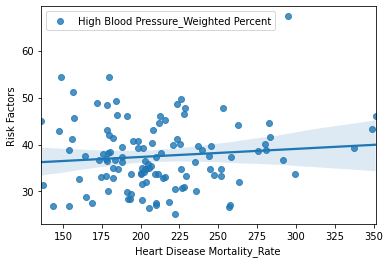

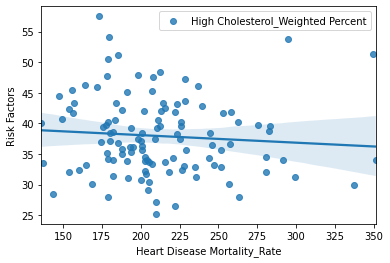

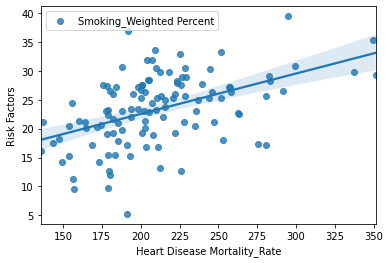

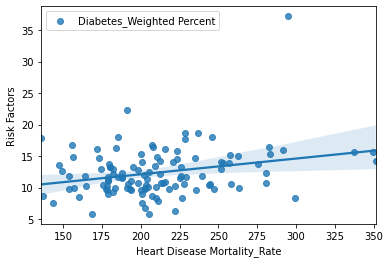

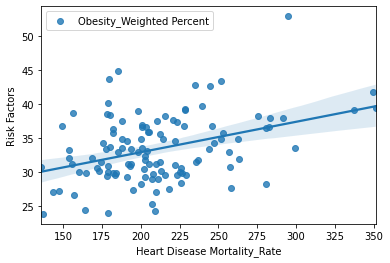

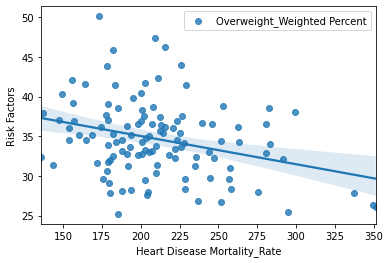

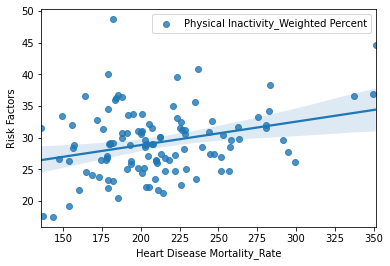

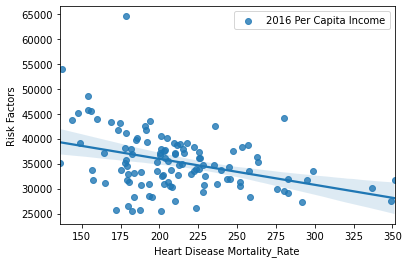

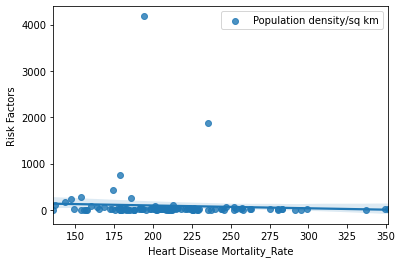

In [62]:
clists = columnlist2[2:]
for i in clists:
    ax = sns.regplot(data=hd_riskfactors, x='HD Mortality_Rate', y=i, label=i)
    ax.legend()
    ax.set_ylabel('Risk Factors')
    ax.set_xlabel('Heart Disease Mortality_Rate')
    plt.show()

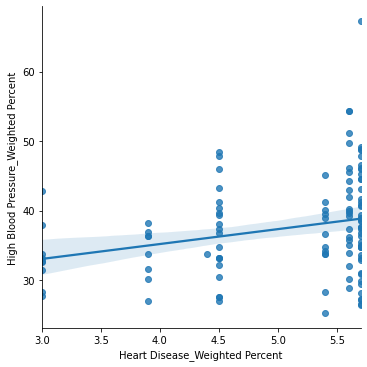

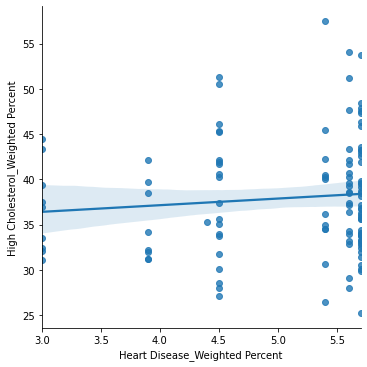

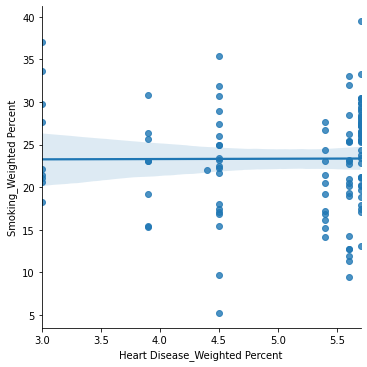

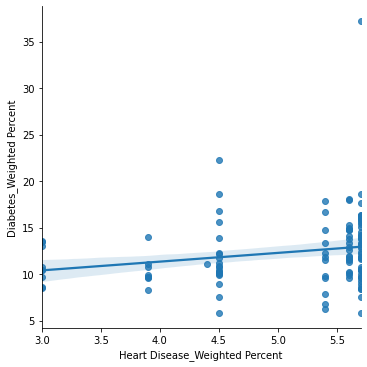

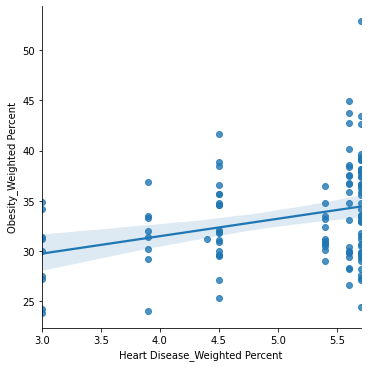

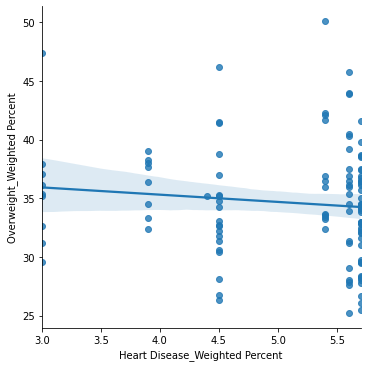

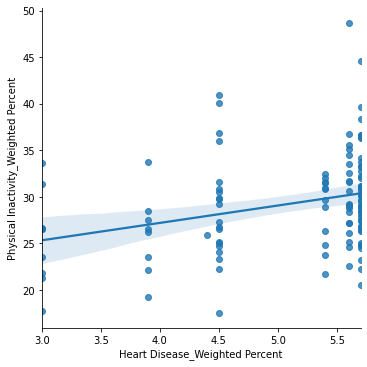

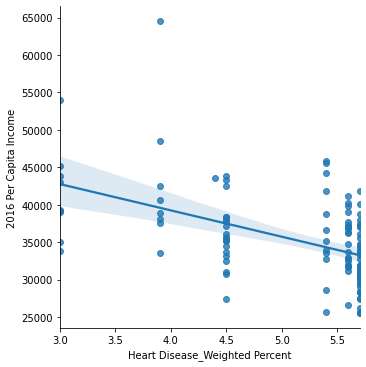

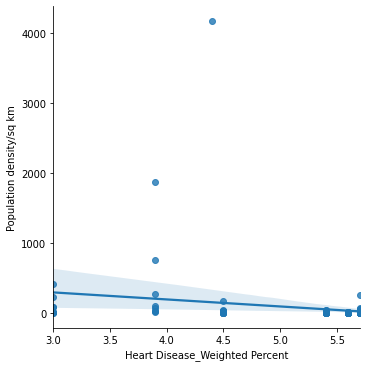

In [63]:
clists = columnlist2[2:]
for i in clists:
    ax = sns.lmplot(data=hd_riskfactors, x="Heart Disease_Weighted Percent", y=i)
    plt.show()

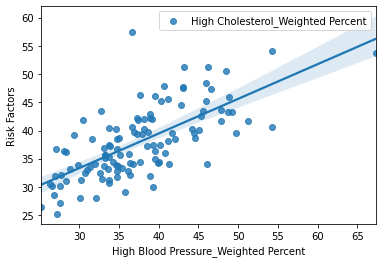

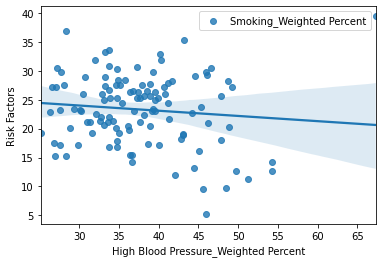

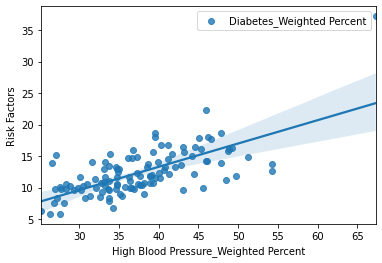

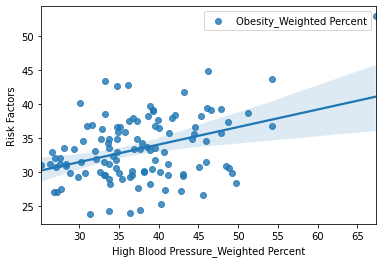

In [64]:
for i in columnlist2[3:7]:
    ax = sns.regplot(data=hd_riskfactors, x='High Blood Pressure_Weighted Percent', y=i, label=i)
    ax.legend()
    ax.set_ylabel('Risk Factors')
    ax.set_xlabel('High Blood Pressure_Weighted Percent')
    plt.show()

Conclusion: It looks like that heart disease mortality has positive relationship with risk factors of current smoking, obesity, overweight and physical inactivity. The correlations between heart disease and average personal income are negative. 

### 3. Correlation Test

In [65]:
from scipy.stats import pearsonr

In [66]:
def correlations(dt1, dt2, columnlists):
    """(dataframe, dataframe, list) -> print
    
    This function calculate and print the coefficent and p-value."""
    for i in columnlists:
        a = pearsonr(dt1, dt2[i])
        print(dt1.name+', '+ i +': coefficent: {}, p-value: {}'.format(round(a[0], 5), round(a[1],5)))

In [67]:
correlations(hdmc['HD Mortality_Rate'], hdmc, columnlist[2:])

HD Mortality_Rate, HD Emergency Room Visits_Rate: coefficent: 0.43244, p-value: 0.0
HD Mortality_Rate, HD Hospitalizations_Rate: coefficent: 0.42996, p-value: 0.0
HD Mortality_Rate, 2016 Per Capita Income: coefficent: -0.36541, p-value: 5e-05
HD Mortality_Rate, Population density/sq km: coefficent: -0.05898, p-value: 0.52939


In [68]:
correlations(hd_riskfactors['HD Mortality_Rate'], hd_riskfactors, columnlist2[1:])

HD Mortality_Rate, Heart Disease_Weighted Percent: coefficent: 0.23019, p-value: 0.01293
HD Mortality_Rate, High Blood Pressure_Weighted Percent: coefficent: 0.10139, p-value: 0.27883
HD Mortality_Rate, High Cholesterol_Weighted Percent: coefficent: -0.08186, p-value: 0.38237
HD Mortality_Rate, Smoking_Weighted Percent: coefficent: 0.47852, p-value: 0.0
HD Mortality_Rate, Diabetes_Weighted Percent: coefficent: 0.2733, p-value: 0.00299
HD Mortality_Rate, Obesity_Weighted Percent: coefficent: 0.38548, p-value: 2e-05
HD Mortality_Rate, Overweight_Weighted Percent: coefficent: -0.30967, p-value: 0.00072
HD Mortality_Rate, Physical Inactivity_Weighted Percent: coefficent: 0.29696, p-value: 0.00121
HD Mortality_Rate, 2016 Per Capita Income: coefficent: -0.36541, p-value: 5e-05
HD Mortality_Rate, Population density/sq km: coefficent: -0.05898, p-value: 0.52939


In [69]:
correlations(hd_riskfactors['Heart Disease_Weighted Percent'], hd_riskfactors, columnlist2[2:])

Heart Disease_Weighted Percent, High Blood Pressure_Weighted Percent: coefficent: 0.25446, p-value: 0.00584
Heart Disease_Weighted Percent, High Cholesterol_Weighted Percent: coefficent: 0.09767, p-value: 0.29693
Heart Disease_Weighted Percent, Smoking_Weighted Percent: coefficent: 0.00471, p-value: 0.95995
Heart Disease_Weighted Percent, Diabetes_Weighted Percent: coefficent: 0.20633, p-value: 0.02627
Heart Disease_Weighted Percent, Obesity_Weighted Percent: coefficent: 0.30038, p-value: 0.00105
Heart Disease_Weighted Percent, Overweight_Weighted Percent: coefficent: -0.10857, p-value: 0.246
Heart Disease_Weighted Percent, Physical Inactivity_Weighted Percent: coefficent: 0.30118, p-value: 0.00102
Heart Disease_Weighted Percent, 2016 Per Capita Income: coefficent: -0.49694, p-value: 0.0
Heart Disease_Weighted Percent, Population density/sq km: coefficent: -0.1971, p-value: 0.03395


Conclusion: Some correlation coefficients are not significant probably because the sample sizes are small. In the future, other state data can be add to inscrease the sample sizes.

In [ ]:
%%bash
git pull
git add final.ipynb
git commit -a -m "Submitting final assignment"
git push